# **1. Perkenalan**
---
### **Final Project: Clusturn**

### **NOTEBOOK EDA AFTER CLUSTERING UNTUK CUSTOMER SEGMENTATION YANG CHURN**

**Group 2:** 
1. Azhar Muhammad
2. Nathanael August Zefanya
3. Pradita Ajeng Wiguna

Analisis segmentasi ini bertujuan untuk memahami karakteristik pelanggan yang telah churn, dengan harapan dapat:
- Mengidentifikasi pola perilaku pelanggan sebelum mereka berhenti berlangganan,
- Menyusun strategi retensi yang lebih tepat sasaran di masa mendatang,
- Memberikan insight bagi tim bisnis untuk melakukan intervensi lebih dini pada pelanggan yang masih aktif namun menunjukkan tanda-tanda menyerupai kelompok churn.


# **2. Import Libraries**
---
Pada tahap awal ini, saya mengimpor semua library yang diperlukan untuk proses pengolahan data, visualisasi, modeling, dan evaluasi model. Semua library saya kumpulkan dalam satu cell agar notebook lebih rapi.

In [7]:
# Import libraries
import pandas as pd
import numpy as np

# Libraries untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading**
---

In [8]:
# Load Dataset
# Dataset hasil preprocessing sebelumnya
df_clustered = pd.read_csv('../data/customer_clustered.csv')

# Menampilkan dataframe
df_clustered

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn,cluster
0,0.0,0,37,0,875,14,0.0,11.0,2,1,2,25.0,40.005,1,1
1,0.0,0,37,0,0,0,0.0,0.0,2,1,2,25.0,0.000,1,1
2,23.0,1,33,0,955,47,16.0,17.0,2,1,2,25.0,117.090,1,0
3,13.0,1,36,1,5488,98,26.0,24.0,2,1,1,25.0,383.220,1,0
4,9.0,0,35,0,2990,41,9.0,16.0,3,1,2,30.0,157.240,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2.0,1,22,1,1082,14,0.0,9.0,3,1,1,30.0,43.840,1,2
442,28.0,1,35,0,1260,53,23.0,19.0,3,1,2,30.0,144.520,1,0
443,14.0,0,38,0,2573,50,41.0,33.0,4,1,2,37.5,168.075,1,0
444,8.0,1,22,2,1792,25,7.0,9.0,3,1,1,30.0,100.680,1,2


In [9]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             446 non-null    float64
 1   complains                446 non-null    int64  
 2   subscription_length      446 non-null    int64  
 3   charge_amount            446 non-null    int64  
 4   seconds_of_use           446 non-null    int64  
 5   frequency_of_use         446 non-null    int64  
 6   frequency_of_sms         446 non-null    float64
 7   distinct_called_numbers  446 non-null    float64
 8   age_group                446 non-null    int64  
 9   tariff_plan              446 non-null    int64  
 10  status                   446 non-null    int64  
 11  age                      446 non-null    float64
 12  customer_value           446 non-null    float64
 13  churn                    446 non-null    int64  
 14  cluster                  4

In [10]:
df_clustered.describe().T

,count,mean,std,min,25%,50%,75%,max
call_failure,446.0,7.810538,7.730465,0.0,1.000,6.000,12.00,28.5000
complains,446.0,0.426009,0.495050,0.0,0.000,0.000,1.00,1.0000
subscription_length,446.0,33.455157,5.791626,22.0,31.000,35.000,37.00,45.0000
charge_amount,446.0,0.248879,0.638422,0.0,0.000,0.000,0.00,4.0000
seconds_of_use,446.0,1635.466368,1497.756384,0.0,438.000,1256.500,2458.00,5488.0000
frequency_of_use,446.0,30.697309,26.091117,0.0,7.000,29.000,46.75,100.0000
frequency_of_sms,446.0,15.218610,15.353837,0.0,1.000,11.000,24.00,58.5000
distinct_called_numbers,446.0,13.072309,10.773845,0.0,3.250,11.000,20.00,45.1250
age_group,446.0,2.822870,0.711079,2.0,2.000,3.000,3.00,5.0000
tariff_plan,446.0,1.013453,0.115333,1.0,1.000,1.000,1.00,2.0000


In [11]:
df_clustered.columns

Index(['call_failure', 'complains', 'subscription_length', 'charge_amount',
       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms',
       'distinct_called_numbers', 'age_group', 'tariff_plan', 'status', 'age',
       'customer_value', 'churn', 'cluster'],
      dtype='object')

In [12]:
df = df_clustered.copy()

# **4. EDA - After Clustering**
---

### **4.1. Distribusi Jumlah Pelanggan dalam setiap Cluster**

In [13]:
df_clustered.head()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn,cluster
0,0.0,0,37,0,875,14,0.0,11.0,2,1,2,25.0,40.005,1,1
1,0.0,0,37,0,0,0,0.0,0.0,2,1,2,25.0,0.000,1,1
2,23.0,1,33,0,955,47,16.0,17.0,2,1,2,25.0,117.090,1,0
3,13.0,1,36,1,5488,98,26.0,24.0,2,1,1,25.0,383.220,1,0
4,9.0,0,35,0,2990,41,9.0,16.0,3,1,2,30.0,157.240,1,1


In [14]:
# Menampilkan jumlah pelanggan churn per cluster
df_clustered['cluster'].value_counts().sort_index()

cluster
0    169
1    216
2     61
Name: count, dtype: int64

Dari data yang terkumpul, terdapat 169 pelanggan churn yang masuk ke dalam cluster 0, 216 pelanggan churn yang masuk ke dalam cluster 1, serta 61 pelanggan churn di cluster 2.

### **4.2. Analisis Statistik Deskriptif per Cluster**

Segmentasi pelanggan *churn* menghasilkan **3 klaster berbeda**, masing-masing dengan karakteristik unik berdasarkan perilaku dan profil pelanggan.

**Statistik Deskriptif Cluster 0**

In [15]:
# Statistik Deskriptif Cluster 0
cluster_0 = df_clustered[df_clustered["cluster"] == 0]
cluster_0.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,169.0,15.26,6.99,0.00,10.00,14.0,20.0,28.50
complains,169.0,0.62,0.49,0.00,0.00,1.0,1.0,1.00
subscription_length,169.0,34.91,3.74,25.00,33.00,35.0,37.0,44.00
charge_amount,169.0,0.18,0.47,0.00,0.00,0.0,0.0,2.00
seconds_of_use,169.0,2651.58,1652.92,245.00,1200.00,2493.0,3375.0,5488.00
frequency_of_use,169.0,56.33,19.63,16.00,44.00,50.0,59.0,100.00
frequency_of_sms,169.0,25.35,16.87,0.00,11.00,24.0,36.0,58.50
distinct_called_numbers,169.0,22.23,8.34,2.00,17.00,20.0,29.0,45.12
age_group,169.0,2.66,0.64,2.00,2.00,3.0,3.0,4.00
tariff_plan,169.0,1.04,0.19,1.00,1.00,1.0,1.0,2.00


**Statistik Deskriptif Cluster 1**

In [16]:
# Statistik Deskriptif Cluster 1
cluster_1 = df_clustered[df_clustered["cluster"] == 1]
cluster_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,216.0,3.06,3.26,0.0,0.00,2.00,5.00,12.00
complains,216.0,0.25,0.43,0.0,0.00,0.00,0.00,1.00
subscription_length,216.0,35.56,3.89,24.0,33.00,36.00,38.00,45.00
charge_amount,216.0,0.05,0.27,0.0,0.00,0.00,0.00,2.00
seconds_of_use,216.0,889.17,1033.24,0.0,6.00,461.50,1405.50,5253.00
frequency_of_use,216.0,13.98,15.82,0.0,0.75,8.00,24.00,82.00
frequency_of_sms,216.0,9.67,10.55,0.0,0.00,7.00,16.00,48.00
distinct_called_numbers,216.0,7.47,8.54,0.0,0.75,4.00,11.00,33.00
age_group,216.0,2.98,0.79,2.0,2.00,3.00,4.00,5.00
tariff_plan,216.0,1.00,0.00,1.0,1.00,1.00,1.00,1.00


**Statistik Deskriptif Cluster 2**

In [17]:
# Statistik Deskriptif Cluster 2
cluster_1 = df_clustered[df_clustered["cluster"] == 2]
cluster_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,61.0,3.97,3.97,0.0,0.0,3.00,7.0,14.00
complains,61.0,0.52,0.50,0.0,0.0,1.00,1.0,1.00
subscription_length,61.0,22.00,0.00,22.0,22.0,22.00,22.0,22.00
charge_amount,61.0,1.15,1.08,0.0,0.0,1.00,2.0,4.00
seconds_of_use,61.0,1462.95,467.50,0.0,1193.0,1487.00,1783.0,2502.00
frequency_of_use,61.0,18.90,8.64,0.0,13.0,19.00,25.0,36.00
frequency_of_sms,61.0,6.80,9.02,0.0,0.0,3.00,10.0,39.00
distinct_called_numbers,61.0,7.56,4.98,0.0,4.0,7.00,10.0,24.00
age_group,61.0,2.74,0.44,2.0,2.0,3.00,3.0,3.00
tariff_plan,61.0,1.00,0.00,1.0,1.0,1.00,1.0,1.00


### **4.3. Distribusi Umur per Cluster**

Hasil analisis ini akan menunjukkan rata-rata umur (`age`) pelanggan `churn` per cluster.

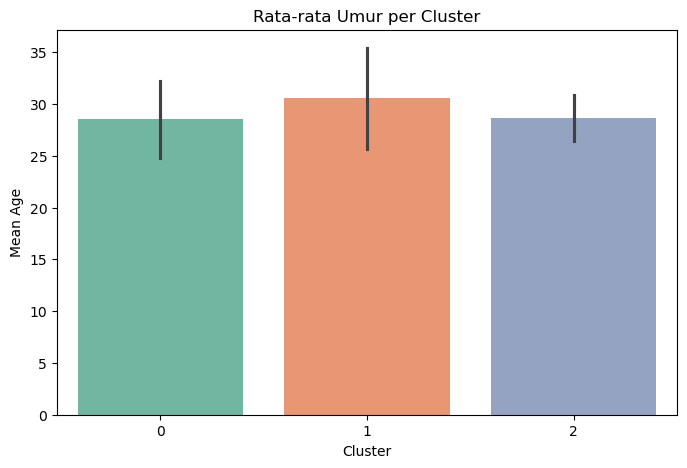

Rata-rata umur per cluster:
cluster
0    28.51
1    30.54
2    28.69
Name: age, dtype: float64


In [18]:
# Membuat barplot
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='cluster', y='age', estimator='mean', ci='sd', palette='Set2')
plt.title('Rata-rata Umur per Cluster')
plt.ylabel('Mean Age')
plt.xlabel('Cluster')
plt.show()

# Menampilkan output rata-rata umur per cluster
mean_age_per_cluster = df.groupby('cluster')['age'].mean().round(2)
print("Rata-rata umur per cluster:")
print(mean_age_per_cluster)

Insight:
1. Dari grafik di atas, Cluster 1 merupakan cluster dengan rata-rata umur pelanggan churn tertinggi. Umur pelanggan churn pada cluster 1 rata-rata berusia 30 tahun.
2. Umur pelanggan churn pada Cluster 0 dan Cluster 2 memiliki rata-rata umur yang sama, yaitu sekitar 28-29 tahun. 
3. Secara keseluruhan, pelanggan churn pada masing-masing cluster berada pada usia produktif secara finansial, sehingga kemungkinan memiliki standar penggunaan layanan baik dari segi biaya, layanan, ataupun faktor lainnya yang mempengaruhi keputusan untuk berhenti berlangganan.

### **4.4. Distribusi Pengajuan Keluhan per Cluster**

Selanjutnya, kita akan melihat pengajuan keluhan dari pelanggan churn masing-masing cluster.

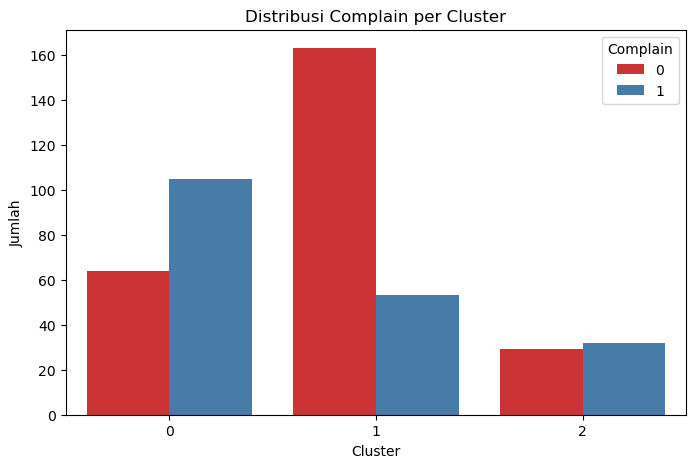

Jumlah pelanggan sesuai pengajuan keluhan per cluster:
complains    0    1
cluster            
0           64  105
1          163   53
2           29   32


In [19]:
# Membuat barplot
plt.figure(figsize=(8,5))
sns.countplot(data=df_clustered, x='cluster', hue='complains', palette='Set1')
plt.title('Distribusi Complain per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.legend(title='Complain')
plt.show()

# Menampilkan output status pengajuan keluhan per cluster
complain_dist = df_clustered.groupby('cluster')['complains'].value_counts().unstack().fillna(0).astype(int)
print("Jumlah pelanggan sesuai pengajuan keluhan per cluster:")
print(complain_dist)

Insight:
1. Berdasarkan grafik di atas, pelanggan churn pada Cluster 1 terlihat paling banyak berhenti berlangganan tanpa mengajukan keluhan, yaitu berjumlah 163 orang.
2. Pelanggan churn yang paling banyak mengajukan keluhan berada pada Cluster 0, yaitu sebanyak 105. Sedangkan pengajuan keluhan dari pelanggan churn dari Cluster 2 cukup berimbang.
3. Dari distribusi data tersebut, perbandingan pelanggan churn sebelum dan sesudah mengajukan keluhan cenderung seimbang. Terdapat pelanggan yang berhenti berlangganan setelah mengajukan keluhan, di mana hal ini mungkin disebabkan oleh ketidakpuasan layanan customer service yang disediakan perusahaan. Selain itu, pelanggan yang berhenti berlangganan tanpa mengajukan keluhan kemungkinan menemukan alternatif produk lain yang dianggap lebih baik tanpa repot-repot untuk mengajukan keluhan terlebih dahulu, sehingga mereka membiarkan paket berlangganannya habis masa berlaku sebelum menggunakan paket berlangganan perusahaan lain.

### **4.5. Distribusi Biaya Tambahan Penggunaan Layanan per Cluster**

Pada analisis ini kita akan melihat distribusi biaya tambahan layanan per cluster melalui fitur `charge_amount`.

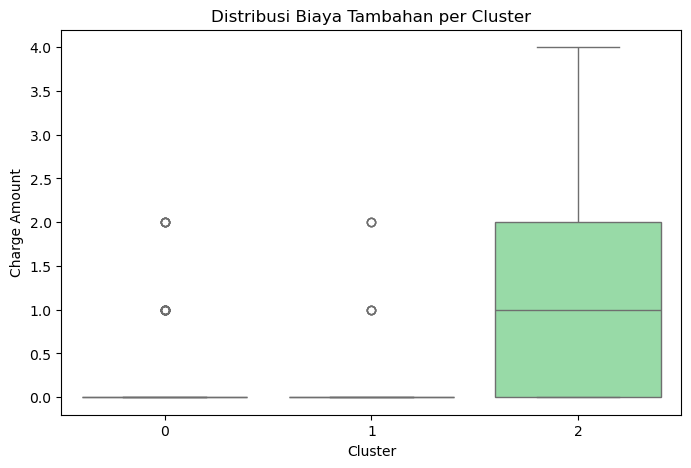

In [26]:
# Membuat boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='charge_amount', data=df_clustered, palette='pastel')
plt.title('Distribusi Biaya Tambahan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Charge Amount')
plt.show()

Insight:
1. Pelanggan churn pada Cluster 0 dan Cluster 1 sebagian besar tidak memiliki biaya layanan tambahan.
2. Pelanggan churn pada Cluster 2 paling banyak mendapatkan biaya layanan tambahan.
3. Dari distribusi data tersebut, kemungkinan besar pelanggan churn pada Cluster 0 dan Cluster 1 tidak menggunakan banyak layanan tambahan. Sedangkan pelanggan churn Cluster 2 kemungkinan besar banyak menggunakan layanan tambahan (seperti nada sambung pribadi), atau mungkin juga sering menelepon, menggunakan sms atau internet tanpa menggunakan paket langganan. Terdapat kemungkinan juga mereka tidak sadar kalau paket berlangganannya sudah berakhir / habis kuotanya, sehingga tidak sengaja terkena biaya tambahan saat menggunakannya.

### **4.6. Distribusi Kegagalan Penggunaan Telepon per Cluster**

Pada analisis ini kita akan melihat distribusi jumlah kegagalan panggilan telepon per cluster melalui fitur `call_failure`.

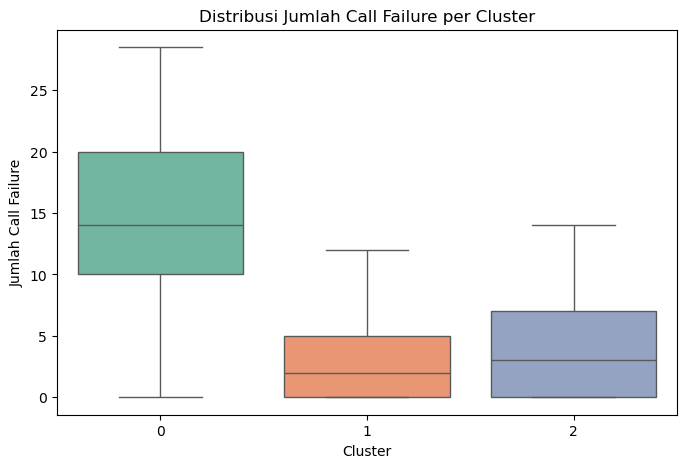

In [21]:
# Membuat boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='call_failure', data=df_clustered, palette='Set2')
plt.title('Distribusi Jumlah Call Failure per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Call Failure')
plt.show()

Insight:
1. Pelanggan churn pada Cluster 0 terlihat sangat sering mengalami kegagalan dalam melakukan panggilan telepon.
2. Pelanggan churn pada Cluster 1 dan Cluster 2 memiliki jumlah kegagalan panggilan telepon yang cukup rendah. Hal ini salah satunya disebabkan karena penggunaannya tidak sesering Cluster 0.
3. Dari distribusi data ini, kemungkinan besar pelanggan churn pada Cluster 0 karena terlalu sering mengalami kegagalan dalam melakukan panggilan telepon selama berlangganan dengan produk ini.

### **4.7. Distribusi Aktivitas Penggunaan Layanan per Cluster**

Pada analisis ini kita akan melihat distribusi penggunaan layanan per cluster melalui fitur `second_of_use`, `frequency_of_use`, dan `frequency_of_sms`.

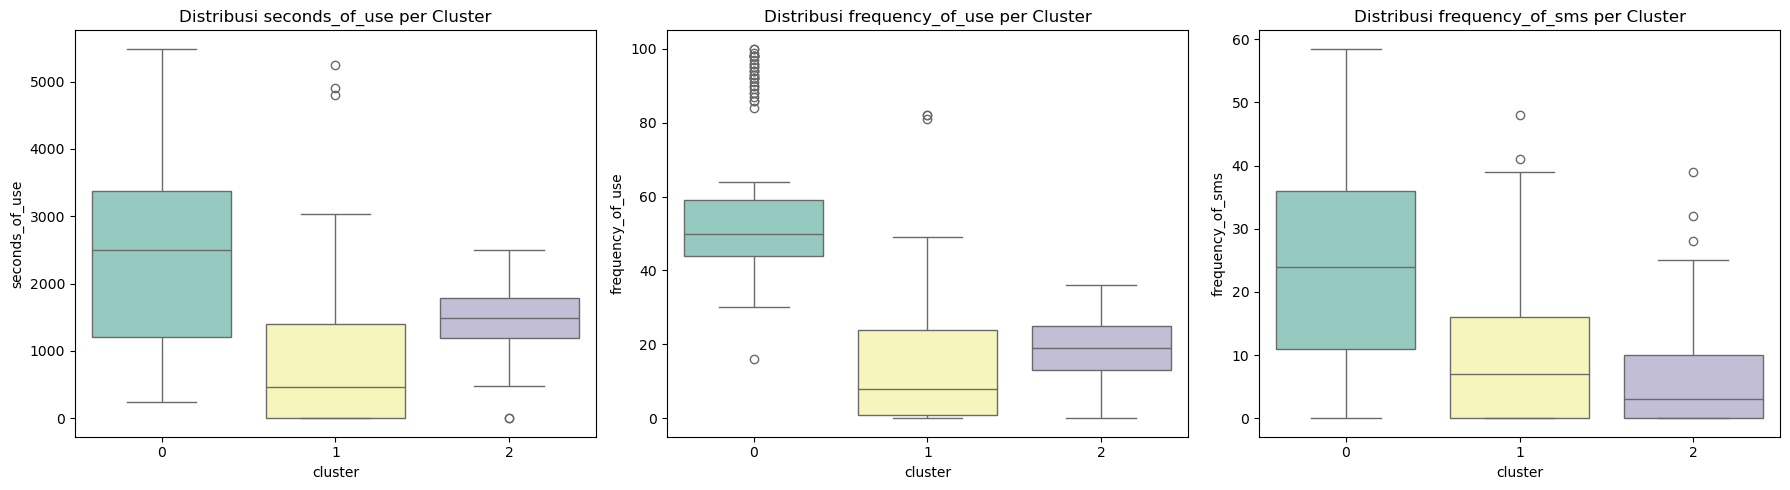

In [22]:
# Mendefinisikan boxplot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
features = ['seconds_of_use', 'frequency_of_use', 'frequency_of_sms']

# Menentukan input per fitur
for i, col in enumerate(features):
    sns.boxplot(data=df_clustered, x='cluster', y=col, ax=axs[i], palette='Set3')
    axs[i].set_title(f'Distribusi {col} per Cluster')

plt.tight_layout()
plt.show()

Insight:
1. Pelanggan churn pada Cluster 0 terlihat sangat aktif dalam melakukan panggilan telepon dan menggunakan sms.
2. Pelanggan churn pada Cluster 1 merupakan cluster paling pasif karena memiliki frekuensi dan durasi penggunaan telpon paling rendah dibanding cluster lainnya.
3. Pelanggan churn pada Cluster 2 cenderung aktif dalam melakukan panggilan telepon, namun sangat rendah penggunaan smsnya.
4. Dari distribusi data tersebut, dapat dipastikan bahwa Cluster 0 adalah cluster paling aktif dalam menggunakan layanan berlangganan melalui penggunaan telepon dan sms. Pada akhirnya, mereka memilih untuk berhenti berlangganan mungkin karena terjadi kendala pada sinyal / koneksi saat melakukan telepon (juga tercermin pada fitur `call_failure`), biaya telepon / sms yang menurut mereka besar, atau alasan lainnya yang berhubungan dengan kualitas pelayanan paket berlangganan yang mereka pernah gunakan.

### **4.8. Distribusi Lama Berlangganan per Cluster**

Kemudian kita akan melihat distribusi `subscription_length` masing-masing pelanggan churn per cluster.

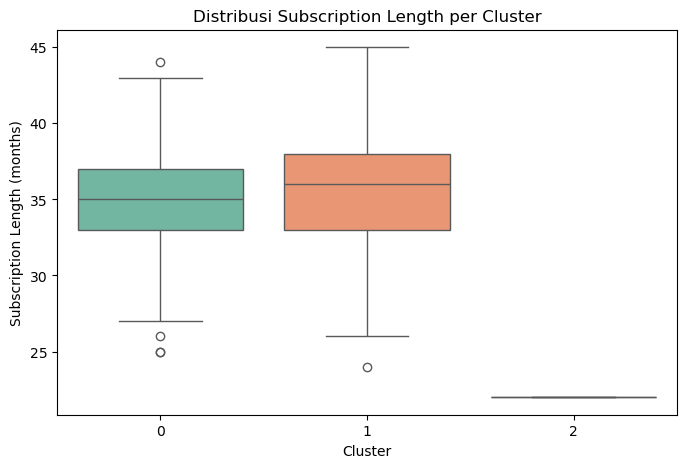

In [23]:
# Membuat boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='cluster', y='subscription_length', palette='Set2')
plt.title('Distribusi Subscription Length per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Subscription Length (months)')
plt.show()

Insight:
1. Pelanggan churn pada Cluster 0 dan 1 terlihat memiliki waktu berlangganan yang hampir sama sebelum berhenti berlangganan, yaitu sekitar 35-38 bulan.
2. Pelanggan churn pada Cluster 2 terlihat berhenti berlangganan sebelum 24 bulan.
3. Dari distribusi data tersebut, kemungkinan besar Cluster 0 dan 1 adalah pelanggan setia yang pada akhirnya memilih untuk berhenti berlangganan karena berbagai alasan, seperti karena biaya berlangganan yang semakin mahal, terdapat gangguan koneksi / sinyal yang mengurangi performa layanan, atau memang memilih produk kompetitor sebagai alternatif paket berlangganan. Sedangkan Cluster 2 kemungkinan besar adalah pelanggan baru yang kurang puas dengan pelayanan / produk dari awal, sehingga mereka tidak sungkan untuk menghentikan langganan sebelum 2 tahun.

### **4.9. Distribusi Jenis Berlangganan per Cluster**

Kita akan melihat distribusi jenis berlangganan dari fitur `tariff_plan` pelanggan churn.

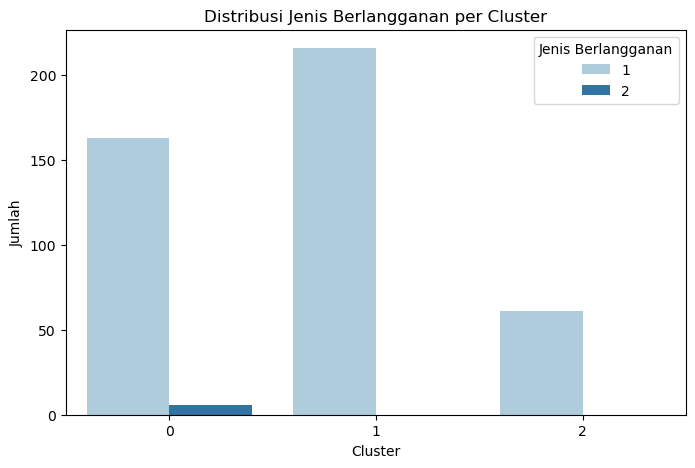

Jumlah pelanggan per jenis berlangganan di tiap cluster:
tariff_plan    1  2
cluster            
0            163  6
1            216  0
2             61  0


In [24]:
# Membuat barplot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='cluster', hue='tariff_plan', palette='Paired')
plt.title('Distribusi Jenis Berlangganan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.legend(title='Jenis Berlangganan')
plt.show()

# Menampilkan output jumlah pelanggan per tariff_plan per cluster
tariff_plan_num = df.groupby('cluster')['tariff_plan'].value_counts().unstack().fillna(0).astype(int)
print("Jumlah pelanggan per jenis berlangganan di tiap cluster:")
print(tariff_plan_num)

Insight:
1. Pelanggan churn untuk yang berlangganan produk pascabayar hanya terdapat pada cluster 0.
2. Sesuai dengan jumlah clustering yang dilakukan sebelumnya, pelanggan churn dengan jenis langganan prabayar terbanyak berada pada Cluster 1.
3. Dari distribusi data tersebut, kemungkinan besar pelanggan churn mengalami ketidakpuasan dalam layanan produk prabayar, baik dari segi biaya maupun kualitas koneksinya.

### **4.10. Distribusi Customer Value per Cluster**

Analisis data terakhir yang akan dilakukan adalah melihat distribusi nilai `customer_value` per cluster.

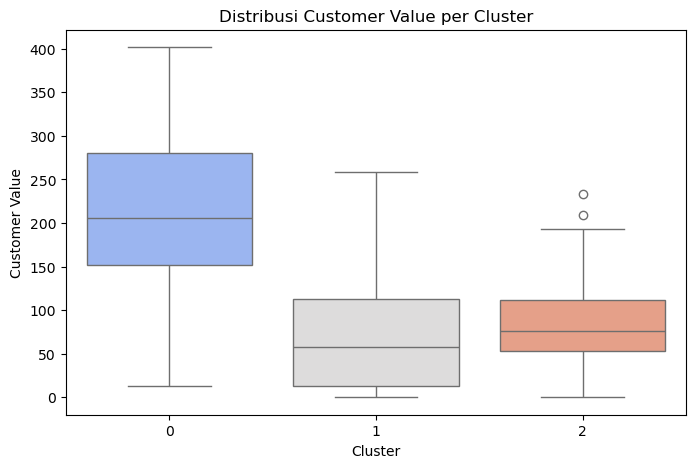

In [25]:
# Membuat boxpplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='cluster', y='customer_value', palette='coolwarm')
plt.title('Distribusi Customer Value per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Value')
plt.show()

Insight:
1. Pelanggan churn pada Cluster 0 memiliki Customer Value tertinggi. Hal ini juga terlihat dari aktivitas pemakaian layanan yang mengharuskan pelanggan untuk melakukan pembelian paket lebih sering dari cluster lainnya. 
2. Secara umum, pelanggan churn pada Cluster 1 dan Cluster 2 memiliki nilai Customer Value yang moderat walaupun Cluster 1 memiliki nilai yang sedikit lebih rendah.
3. Berdasarkan distribusi data per cluster di atas, kemungkinan besar pelanggan churn pada Cluster 0 karena kualitas pelayanan yang tidak memenuhi ekspektasi. Hal ini dapat diwakili salah satunya oleh banyaknya kegagalan pemanggilan telepon yang dilakukan yang selaras dengan aktivitas penggunaan yang aktif dari cluster ini.


# **5. Ringkasan Karakteristik Per Cluster**
---

### **5.1. Cluster 0**

**Cluster 0 – Aktif, berpengalaman, tapi churn karena kualitas**

**Ciri-ciri:**
* **Masa langganan**: Panjang (rata-rata 35 bulan)
* **Penggunaan tinggi**:
  * Rata-rata *seconds\_of\_use* > 2600
  * *frequency\_of\_use* dan *frequency\_of\_sms* juga tinggi
* **Call failure sangat tinggi**: \~15, tertinggi di antara cluster lain
* **Charge amount sangat rendah**: 0.18 → hampir tidak dikenai biaya ekstra
* **Customer value**: Sangat tinggi (rata-rata 213.27)
* **Demografi**: Usia muda hingga pertengahan (rata-rata 28.5 tahun)

**Interpretasi:**

Cluster ini sangat aktif dan loyal, namun cukup sering mengalami **masalah teknis (call failure)**. Meskipun mereka tidak terbebani oleh biaya tambahan yang tinggi, pengalaman dan penanganan keluhan yang tidak sesuai harapan kemungkinan dapat menjadi alasan untuk berhenti berlangganan / churn.

### **5.2. Cluster 1**

**Cluster 1 – Pasif, jarang pakai, churn karena tidak melihat benefitnya**

**Ciri-ciri:**
* **Masa langganan**: Lama (rata-rata 35.5 bulan)
* **Penggunaan sangat rendah**:
  * *seconds\_of\_use*: hanya 889 detik
  * *frequency\_of\_use*: 13.98
  * *frequency\_of\_sms*: 9.67
* **Call failure sangat rendah** (\~3)
* **Charge amount sangat rendah** (0.05)
* **Customer value**: Terendah (68.39)
* **Usia sedikit lebih tua** (rata-rata 30.5 tahun)

**Interpretasi:**

Cluster ini adalah pengguna pasif yang jarang memakai layanan. Churn terjadi kemungkinan besar karena **rendahnya aktivitas dan minimnya pengetahuan akan jenis layanan**. Mereka tidak pernah mengalami masalah teknis ataupun biaya tinggi, tapi karena jarang menggunakan layanannya, mereka cenderung berhenti berlangganan karena tidak memiliki ikatan emosional / urgensi dalam penggunaan layanan-layanan yang tersedia.

### **5.3. Cluster 2**

**Cluster 2 – Pelanggan baru yang kecewa karena biaya**

**Ciri-ciri:**
* **Masa langganan sangat pendek**: hanya 22 bulan (paling rendah)
* **Usage sedang**: sekitar 1462 detik, frequency sedang
* **Call failure dan complain moderat**
* **Charge amount tertinggi**: 1.15 → bisa berarti dikenai biaya ekstra sejak awal
* **Customer value**: Rendah-menengah (87.87)
* **Usia lebih muda** (28.69)

**Interpretasi:**

Cluster ini berhenti berlangganan lebih cepat dari siklus normal. Kemungkinan besar, mereka merasa terbebani oleh **biaya awal yang tinggi** dan belum sempat merasakan manfaat layanan secara maksimal. Hal ini mendorong pentingnya proses onboarding yang efektif untuk meningkatkan retensi awal.

### **5.4. Ringkasan Cluster**

Ringkasan Karakteristik Cluster

| Cluster | Aktivitas | Lama Langganan | Biaya (Charge) | Keluhan Teknis | Potensi Alasan Churn  |
| ------- | --------- | -------------- | -------------- | -------------- | --------------------- |
| 0       | Tinggi    | Lama           | Rendah         | Tinggi         | Masalah teknis        |
| 1       | Rendah    | Lama           | Sangat rendah  | Rendah         | Tidak melihat benefit |
| 2       | Sedang    | Pendek         | Tinggi         | Sedang         | Beban biaya di awal   |

# **6. Kesimpulan dan Rekomendasi**
---

### **6.1. Kesimpulan**

Dari hasil eksplorasi data dan segmentasi pelanggan churn menggunakan metode clustering, diperoleh 3 kelompok utama:

1. Cluster 0 memiliki karakter pelanggan churn yang aktif dan loyal dengan alasan untuk berhenti langganan salah satunya adalah adanya masalah tekni seperti call failure. Pelanggan ini memiliki nilai yang tinggi berdasarkan durasi dan intensitas penggunaan saat masih berlangganan.

2. Cluster 1 memiliki karakter pelanggan churn yang loyal, namun pasif dan tidak merasa terikat dengan perusahaan. Pelanggan churn pada cluster ini memiliki masa langganan yang cukup panjang namun tidak aktif menggunakan layanannya. Kemungkinan besar alasan churn mereka karena tidak menemukan nilai tambah atau manfaat dari layanan yang digunakan.

3. Cluster 2 kemungkinan besar adalah para pelanggan baru dan sensitif terhadap besaran biaya layanan. Pelanggan baru dibebankan biaya tambahan sejak awal tanpa pengetahuan mengenai manfaat layanannya, sehingga memutuskan untuk berhenti berlangganan lebih awal.



### **6.2. Rekomendasi Bisnis**

Cluster 0:

1. Melakukan peningkatan kualitas teknis pada layanan, contohnya pada layanan telepon (jaringan, sinyal, dan sebagainya).

2. Menerapkan sistem early-warning ketika mengalami call failure melebihi batas tertentu.

3. Memberikan promo atau reward berupa point / kemudahan lainnya untuk menghargai loyalitasnya, atau menawarkan kompensansi atas kegagalan pada layanan yang dialami.

Cluster 1:

1. Memberikan promo dan edukasi sebagai bentuk retensi untuk memberikan gambaran yang jelas mengenai manfaat produk.

2. Launching adanya produk baru untuk membuat para pelanggan ingin berlangganan kembali

3. Evaluasi apakah mereka memang tidak cocok dengan layanan → pertimbangkan downgrade atau resegmentasi.

Cluster 2:

1. Melakukan analisis preferensi para pelanggan untuk mengetahui alasan mereka mulai berlangganan atau manfaat apa yang mereka cari.

2. Rutin memberikan informasi melalui sms / email / Whatsapp  untuk memberikan rekomendasi layanan sesuai dengan kebutuhan pelanggan.

3. Memberikan diskon / promo gratis untuk beberapa layanan (semisal telepon atau sms gratis selama periode tertentu) untuk membangun engagement dengan pelanggan baru ini.